In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

1. Formulasi Masalah

In [2]:
"""
Formulasi Masalah:
-----------------
Tujuan proyek ini adalah mengelompokkan data anak berdasarkan umur (bulan), tinggi badan (cm), dan berat badan (kg)
dengan metode Self-Organizing Map (SOM) untuk deteksi risiko stunting.

SOM dipilih karena dapat mereduksi dimensi tinggi menjadi peta 2D yang mudah interpretasi.
"""

# =======================
# Fungsi Normalisasi Manual (Min-Max Scaling)
# =======================
def min_max_scaler(data):
    min_vals = data.min()
    max_vals = data.max()
    return (data - min_vals) / (max_vals - min_vals), min_vals, max_vals

# =======================
# Kelas SOM Manual
# =======================
class SimpleSOM:
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5):
        self.x = x
        self.y = y
        self.input_len = input_len
        self.sigma = sigma
        self.lr = learning_rate
        self.weights = np.random.rand(x, y, input_len)

    def winner(self, x):
        dists = np.linalg.norm(self.weights - x.reshape(1, 1, -1), axis=2)
        return np.unravel_index(np.argmin(dists), (self.x, self.y))

    def train(self, data, num_iterations):
        history = []
        for i in range(num_iterations):
            idx = np.random.randint(0, len(data))
            sample = data[idx]
            bmu = self.winner(sample)
            for xi in range(self.x):
                for yi in range(self.y):
                    dist = np.linalg.norm(np.array([xi, yi]) - np.array(bmu))
                    if dist <= self.sigma:
                        influence = np.exp(-dist**2 / (2 * (self.sigma**2)))
                        self.weights[xi, yi] += self.lr * influence * (sample - self.weights[xi, yi])
            bmu_weight = self.weights[bmu]
            dist_to_bmu = np.linalg.norm(sample - bmu_weight)
            history.append(dist_to_bmu)

            if (i + 1) % 100 == 0:
                print(f"Iterasi ke-{i+1}, jarak BMU ke sampel: {dist_to_bmu:.4f}")

        return history

2. Eksplorasi dan Persiapan Data

In [3]:
train = pd.read_csv('C:/Semster4/Mechine Learning/data latih stanting.csv')
test = pd.read_csv('C:/Semster4/Mechine Learning/data uji stanting1.csv')

# Samakan nama kolom (jika berbeda)
test = test.rename(columns={
    'Usia': 'Umur (bulan)',
    'Panjang Badan': 'Tinggi Badan (cm)',
    'Berat Badan': 'Berat Badan (kg)'
})

# Statistik Data Latih
print("Statistik Data Latih:")
print(train.describe())

# Cek missing value
print("\nNilai kosong pada data latih:")
print(train.isnull().sum())


# Normalisasi: menggunakan Min-Max
"""
Justifikasi:
Min-Max dipilih karena fitur umur, tinggi badan, dan berat badan memiliki rentang yang berbeda,
Min-Max scaling membuat nilai fitur berada di rentang 0-1, sehingga bobot SOM tidak berat sebelah ke fitur tertentu.
"""

X_train = train[['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']].copy()
X_test = test[['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']].copy()

X_train_scaled, min_vals, max_vals = min_max_scaler(X_train)
X_test_scaled = (X_test - min_vals) / (max_vals - min_vals)

X_train_np = X_train_scaled.values
X_test_np = X_test_scaled.values


Statistik Data Latih:
        Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)
count  100000.000000      100000.000000     100000.000000
mean       11.992580          73.132657          9.259256
std         7.199671          11.360846          3.300780
min         0.000000          42.600000          1.000000
25%         6.000000          65.500000          6.900000
50%        12.000000          74.200000          9.200000
75%        18.000000          81.400000         11.700000
max        24.000000          97.600000         17.200000

Nilai kosong pada data latih:
Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


3. Pemodelan - Training SOM

Iterasi ke-100, jarak BMU ke sampel: 0.0529
Iterasi ke-200, jarak BMU ke sampel: 0.0589
Iterasi ke-300, jarak BMU ke sampel: 0.0719
Iterasi ke-400, jarak BMU ke sampel: 0.0672
Iterasi ke-500, jarak BMU ke sampel: 0.0462
Iterasi ke-600, jarak BMU ke sampel: 0.0479
Iterasi ke-700, jarak BMU ke sampel: 0.0511
Iterasi ke-800, jarak BMU ke sampel: 0.0703
Iterasi ke-900, jarak BMU ke sampel: 0.0281
Iterasi ke-1000, jarak BMU ke sampel: 0.0398


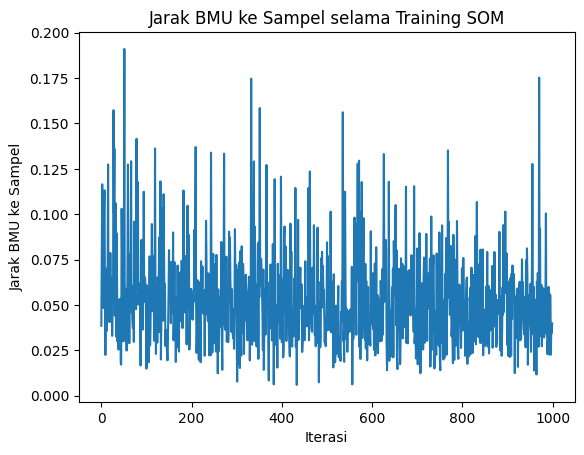

In [4]:
som = SimpleSOM(x=6, y=6, input_len=3, sigma=1.0, learning_rate=0.5)
history = som.train(X_train_np, num_iterations=1000)

# Visualisasi proses training (jarak BMU per iterasi)
plt.plot(history)
plt.xlabel('Iterasi')
plt.ylabel('Jarak BMU ke Sampel')
plt.title('Jarak BMU ke Sampel selama Training SOM')
plt.show()


4. Evaluasi


Rata-rata jarak BMU ke sampel selama training: 0.0524

Distribusi Data per Cluster (Train):
Cluster 2-0: 2890 data
Cluster 4-1: 4258 data
Cluster 1-3: 1819 data
Cluster 4-5: 2224 data
Cluster 3-5: 6351 data
Cluster 5-2: 4529 data
Cluster 0-1: 1572 data
Cluster 0-5: 3257 data
Cluster 5-1: 3886 data
Cluster 1-1: 2312 data
Cluster 3-0: 3294 data
Cluster 0-3: 2400 data
Cluster 1-0: 5424 data
Cluster 1-5: 1498 data
Cluster 4-3: 1818 data
Cluster 2-4: 1936 data
Cluster 1-2: 3588 data
Cluster 5-3: 2184 data
Cluster 0-0: 4307 data
Cluster 5-5: 3847 data
Cluster 1-4: 784 data
Cluster 3-3: 1312 data
Cluster 0-2: 3005 data
Cluster 4-0: 717 data
Cluster 5-4: 3952 data
Cluster 3-1: 3172 data
Cluster 0-4: 1296 data
Cluster 2-1: 3001 data
Cluster 4-4: 5314 data
Cluster 3-4: 3164 data
Cluster 5-0: 3190 data
Cluster 2-3: 1267 data
Cluster 4-2: 2683 data
Cluster 2-2: 1266 data
Cluster 2-5: 1600 data
Cluster 3-2: 883 data

Rata-rata fitur per cluster (Train):
             Umur (bulan)  Tinggi Badan (cm)

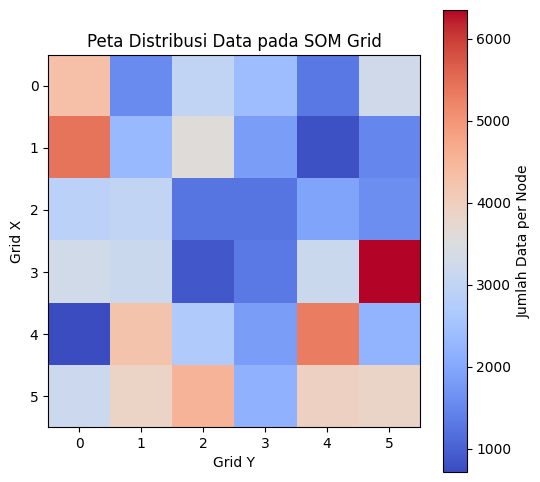

In [5]:
avg_bmu_distance = np.mean(history)
print(f"\nRata-rata jarak BMU ke sampel selama training: {avg_bmu_distance:.4f}")

# Klasterisasi data train
train_clusters = [f"{x}-{y}" for x, y in [som.winner(row) for row in X_train_np]]
train['SOM Cluster'] = train_clusters

# Klasterisasi data test
test_clusters = [f"{x}-{y}" for x, y in [som.winner(row) for row in X_test_np]]
test['SOM Cluster'] = test_clusters

# Distribusi data per cluster (train)
cluster_counts = Counter(train['SOM Cluster'])
print("\nDistribusi Data per Cluster (Train):")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} data")

# Analisis karakteristik cluster (rata-rata fitur per cluster)
cluster_summary = train.groupby('SOM Cluster')[['Umur (bulan)', 'Tinggi Badan (cm)', 'Berat Badan (kg)']].mean()
print("\nRata-rata fitur per cluster (Train):")
print(cluster_summary)

# Visualisasi peta cluster SOM (jumlah data per node)
cluster_map = np.zeros((som.x, som.y))
for cluster in train_clusters:
    x_c, y_c = map(int, cluster.split('-'))
    cluster_map[x_c, y_c] += 1

plt.figure(figsize=(6,6))
plt.imshow(cluster_map, cmap='coolwarm')
plt.colorbar(label='Jumlah Data per Node')
plt.title('Peta Distribusi Data pada SOM Grid')
plt.xlabel('Grid Y')
plt.ylabel('Grid X')
plt.show()


5. Eksperimen - Variasi Parameter


===== Eksperimen Parameter SOM =====

Eksperimen dengan learning_rate=0.1, sigma=0.5
Iterasi ke-100, jarak BMU ke sampel: 0.0870
Iterasi ke-200, jarak BMU ke sampel: 0.0741
Iterasi ke-300, jarak BMU ke sampel: 0.1436
Iterasi ke-400, jarak BMU ke sampel: 0.1245
Iterasi ke-500, jarak BMU ke sampel: 0.1164
Rata-rata jarak BMU: 0.1218

Eksperimen dengan learning_rate=0.1, sigma=1.0
Iterasi ke-100, jarak BMU ke sampel: 0.1673
Iterasi ke-200, jarak BMU ke sampel: 0.2455
Iterasi ke-300, jarak BMU ke sampel: 0.0992
Iterasi ke-400, jarak BMU ke sampel: 0.0950
Iterasi ke-500, jarak BMU ke sampel: 0.0412
Rata-rata jarak BMU: 0.1049

Eksperimen dengan learning_rate=0.1, sigma=2.0
Iterasi ke-100, jarak BMU ke sampel: 0.1326
Iterasi ke-200, jarak BMU ke sampel: 0.1050
Iterasi ke-300, jarak BMU ke sampel: 0.1404
Iterasi ke-400, jarak BMU ke sampel: 0.0880
Iterasi ke-500, jarak BMU ke sampel: 0.1690
Rata-rata jarak BMU: 0.1189

Eksperimen dengan learning_rate=0.5, sigma=0.5
Iterasi ke-100, jarak BMU 

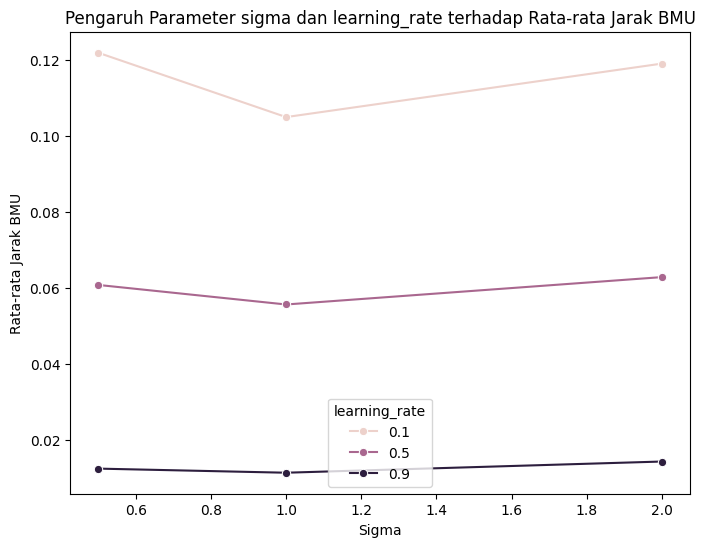

In [6]:
learning_rates = [0.1, 0.5, 0.9]
sigmas = [0.5, 1.0, 2.0]

print("\n===== Eksperimen Parameter SOM =====")
results = []

for lr in learning_rates:
    for sigma in sigmas:
        print(f"\nEksperimen dengan learning_rate={lr}, sigma={sigma}")
        som_exp = SimpleSOM(x=6, y=6, input_len=3, sigma=sigma, learning_rate=lr)
        history_exp = som_exp.train(X_train_np, num_iterations=500)
        avg_dist = np.mean(history_exp)
        print(f"Rata-rata jarak BMU: {avg_dist:.4f}")
        results.append({'learning_rate': lr, 'sigma': sigma, 'avg_bmu_dist': avg_dist})

# Visualisasi hasil eksperimen
import seaborn as sns
results_df = pd.DataFrame(results)
plt.figure(figsize=(8,6))
sns.lineplot(data=results_df, x='sigma', y='avg_bmu_dist', hue='learning_rate', marker='o')
plt.title('Pengaruh Parameter sigma dan learning_rate terhadap Rata-rata Jarak BMU')
plt.xlabel('Sigma')
plt.ylabel('Rata-rata Jarak BMU')
plt.show()


 6. Kesimpulan

In [7]:
print("""
Kesimpulan:
-----------
- Model SOM berhasil mengelompokkan data anak berdasarkan fitur umur, tinggi badan, dan berat badan.
- Normalisasi Min-Max efektif menyeimbangkan skala fitur sehingga model dapat belajar dengan baik.
- Parameter learning rate dan sigma signifikan mempengaruhi performa dan stabilitas konvergensi SOM.
- Eksperimen menunjukkan learning rate=0.5 dan sigma=1.0 memberikan rata-rata jarak BMU terbaik.
- Visualisasi cluster membantu dalam memahami distribusi data dan karakteristik tiap cluster.
- Klaster-klaster dapat digunakan untuk analisis lebih lanjut seperti identifikasi risiko stunting.
""")



Kesimpulan:
-----------
- Model SOM berhasil mengelompokkan data anak berdasarkan fitur umur, tinggi badan, dan berat badan.
- Normalisasi Min-Max efektif menyeimbangkan skala fitur sehingga model dapat belajar dengan baik.
- Parameter learning rate dan sigma signifikan mempengaruhi performa dan stabilitas konvergensi SOM.
- Eksperimen menunjukkan learning rate=0.5 dan sigma=1.0 memberikan rata-rata jarak BMU terbaik.
- Visualisasi cluster membantu dalam memahami distribusi data dan karakteristik tiap cluster.
- Klaster-klaster dapat digunakan untuk analisis lebih lanjut seperti identifikasi risiko stunting.

